$\textbf{Excercise B}$

Given


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from Formulas import f 

span = 20
S = 65
mass = 25883
CD_0 = 0.029
e = 0.9
CL_max = 1.16

Speed_range =np.arange(20,600,1)
#-----------------------
AR = f.AR_Calc(span,S)
k = f.Induced_Drag_Factor_Calc(AR,e)
#Properties Sea level

T_A = f.lbf__N(22 *1000,1)
print(T_A)
P,T,rho = f.get_atmosphere_properties(20000,'ft')

T_A = f.Thrust_0_Thrust_FL(T_A,rho)

V_Stall = f.CL_To_V_Calc(mass,rho,S,CL_max)

print(f'Stall speed: {V_Stall:.2f} m/s')

min_V,Max_V =f.V_Int_FA_FR(T_A,mass*9.81,S,CD_0,k,rho)
print(f'Minimum speed {min_V:.2f} m/s, Max speed {Max_V:.2f} m/s')

97860.8755366
Stall speed: 101.57 m/s
Minimum speed 49.98 m/s, Max speed 337.06 m/s


FL0:
  V_stall = 74.14 m/s
  V_min   = 31.01 m/s
  V_max   = 289.47 m/s

lower speed limit 74.14m/s, due to  STALL
Time to Accelerate: 9.5 s, for flight level FL0


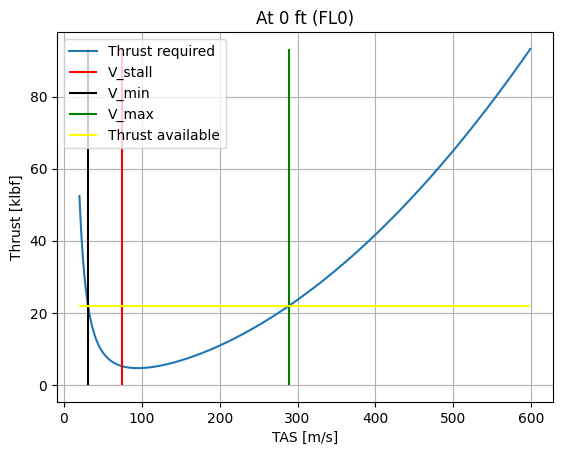

FL20:
  V_stall = 101.57 m/s
  V_min   = 49.98 m/s
  V_max   = 337.06 m/s

lower speed limit 101.57m/s, due to  STALL
Time to Accelerate: 20.5 s, for flight level FL20


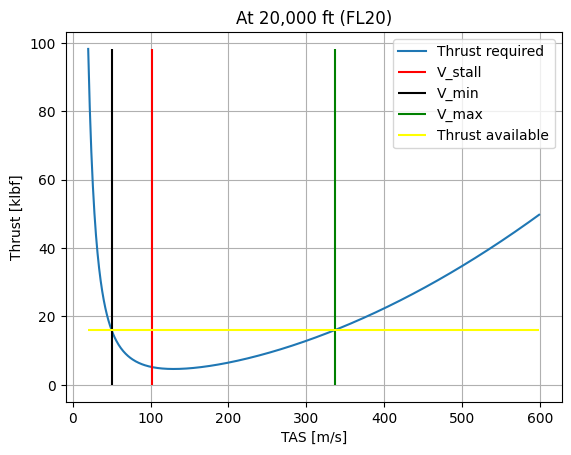

FL30:
  V_stall = 121.21 m/s
  V_min   = 65.48 m/s
  V_max   = 366.43 m/s

lower speed limit 121.21m/s, due to  STALL
Time to Accelerate: 37.5 s, for flight level FL30


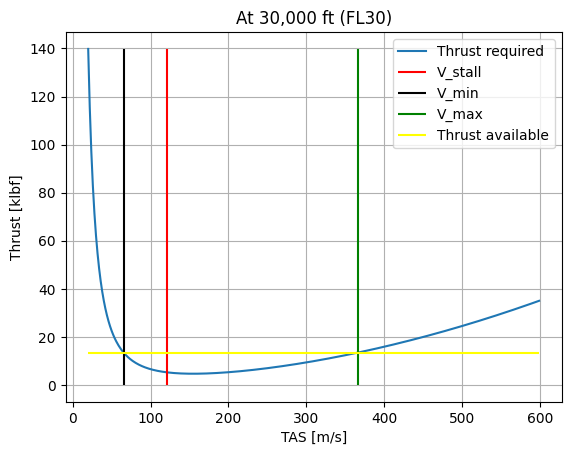

In [34]:
flight_levels = {
    "FL0": 0,
    "FL20": 20000,
    "FL30": 30000
}

for FL_name, altitude_ft in flight_levels.items():

    # Atmosphere
    P, T, rho = f.get_atmosphere_properties(altitude_ft, 'ft')

    # Stall speed
    V_Stall = f.CL_To_V_Calc(mass, rho, S, CL_max)

    # Aerodynamics
    CL = f.V_To_CL_Calc(mass, Speed_range, rho, S)
    CD = f.Cd_Calc(CD_0, k, CL)

    # Thrust required & available
    T_R = f.Thrust_Calc(CD, rho, Speed_range, S)
    T_A = f.Thrust_0_Thrust_FL(22, rho)

    # Speed envelope
    min_V, Max_V = f.V_Int_FA_FR(
        f.lbf__N(T_A * 1000, 1),
        mass * 9.81,
        S,
        CD_0,
        k,
        rho
    )

    print(f"{FL_name}:")
    print(f"  V_stall = {V_Stall:.2f} m/s")
    print(f"  V_min   = {min_V:.2f} m/s")
    print(f"  V_max   = {Max_V:.2f} m/s\n")
    # Determine limiting minimum speed
    V_lower_limit = max(V_Stall, min_V)

    if V_Stall > min_V:
        limiting_factor = "STALL"
    else:
        limiting_factor = "THRUST"

    print(f'lower speed limit {V_lower_limit:.2f}m/s, due to  {limiting_factor}')

    delta_T = 0.5
    v1 = 126.4
    FA = (rho/1.2250)*26*4448.221615
    t1 =0
    while v1 < 158:
        CL_I = f.V_To_CL_Calc(mass,v1,rho,S)
        CD_I = f.Cd_Calc(0.029,k,CL_I)
        Fr = f.Thrust_Calc(CD_I,rho,v1,S)
        Delta_V = delta_T *((FA-Fr)/(mass))
        v1 = v1 + Delta_V
        t1 = t1 + delta_T

    print(f"Time to Accelerate: {t1} s, for flight level {FL_name}")
    # Plot
    plt.figure()
    plt.plot(
        Speed_range,
        f.lbf__N(T_R / 1000, -1),
        label='Thrust required'
    )

    plt.vlines(
        V_Stall, 
        0, 
        np.max(f.lbf__N(T_R / 1000, -1)),
        color='red',
        label='V_stall'
    )

    plt.vlines(
        min_V, 
        0, 
        np.max(f.lbf__N(T_R / 1000, -1)),
        color='black',
        label='V_min'
    )

    plt.vlines(
        Max_V, 
        0, 
        np.max(f.lbf__N(T_R / 1000, -1)),
        color='green',
        label='V_max'
    )

    plt.hlines(
        T_A,
        np.min(Speed_range),
        np.max(Speed_range),
        color='yellow',
        label='Thrust available'
    )

    plt.title(f"At {altitude_ft:,} ft ({FL_name})")
    plt.xlabel("TAS [m/s]")
    plt.ylabel("Thrust [klbf]")
    plt.legend()
    plt.grid()
    plt.show()
